# Example usage

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import afam

asc_dataset = afam.read_asc('data/mono500.asc', search=['!V', 'DISPLAY_COORDS'])

## Get all fixations filtered by the trial

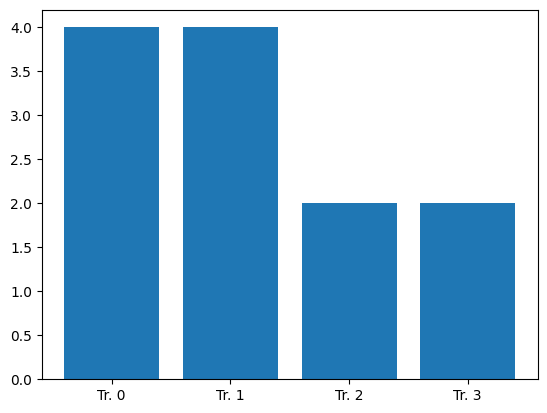

In [3]:
fixations = pd.DataFrame(asc_dataset.event['efix'])
trial_start = [msg for msg in asc_dataset.msg if msg.t == 'TRIALID']
trial_end = [msg for msg in asc_dataset.msg if msg.t == 'TRIAL_RESULT']
trials = list(zip(trial_start, trial_end))

fix_num = []
for trial in trials:
    fix_num.append(len(fixations[(fixations.st > trial[0].st) & (fixations.st < trial[1].st)]))

plt.figure()
plt.bar([f"Tr. {t.data}" for t in trial_start], fix_num)
plt.show()

## Show all samples of the eyetracking session

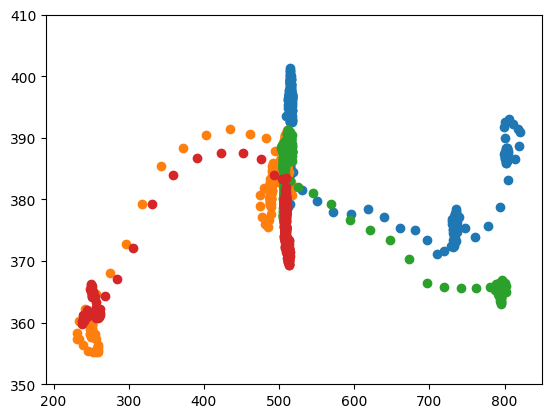

In [4]:
samples = pd.DataFrame(asc_dataset.sample)
trial_start = [msg for msg in asc_dataset.msg if msg.t == 'TRIALID']
trial_end = [msg for msg in asc_dataset.msg if msg.t == 'TRIAL_RESULT']
trials = list(zip(trial_start, trial_end))

plt.figure()
plt.xlim(190,850)
plt.ylim(350,410)
for trial in trials:
    trial_samples = samples[(samples.t > trial[0].st) & (samples.t < trial[1].st)]
    plt.plot(trial_samples.xp, trial_samples.yp, 'o')
plt.show()

## Show all fixations, saccades & target of a specific trial

In [5]:
from unicodedata import name
from IPython.display import display
from ipywidgets import IntSlider, Dropdown
from ipywidgets import interact

disp_coords = [msg.data for msg in asc_dataset.msg if msg.t == 'DISPLAY_COORDS'][0].split(' ')

trial_start = [msg for msg in asc_dataset.msg if msg.t == 'TRIALID']
trial_end = [msg for msg in asc_dataset.msg if msg.t == 'TRIAL_RESULT']
trial_t_x = [int(msg.data.split(' ')[-1]) for msg in asc_dataset.msg if msg.t == '!V' and 't_x' in msg.data]
trial_t_y = [int(msg.data.split(' ')[-1]) for msg in asc_dataset.msg if msg.t == '!V' and 't_y' in msg.data]
trials = list(zip(trial_start, trial_end, trial_t_x, trial_t_y))

fixations = pd.DataFrame(asc_dataset.event['efix'])
saccades = pd.DataFrame(asc_dataset.event['esacc'])

def set_trial(trial_id):
    fix = fixations[(fixations.st > trials[trial_id][0].st) & (fixations.st < trials[trial_id][1].st)]
    sacc = saccades[(saccades.st > trials[trial_id][0].st) & (saccades.et < trials[trial_id][1].st)]
    sacc_x = list(zip(sacc.sx, sacc.ex))
    sacc_y = list(zip(sacc.sy, sacc.ey))

    plt.figure()
    plt.xlim(int(disp_coords[0]), int(disp_coords[2]))
    plt.ylim(int(disp_coords[1]), int(disp_coords[3]))
    plt.plot(fix.x, fix.y, 'o', color='black')
    for i in range(len(sacc_x)):
        plt.plot(sacc_x[i], sacc_y[i], color='orange')
    plt.show()

    print("FIXATIONS:")
    print(fix)
    print("---")
    print("SACCADES:")
    print(sacc)

interact(set_trial, trial_id = range(len(trials)))

interactive(children=(Dropdown(description='trial_id', options=(0, 1, 2, 3), value=0), Output()), _dom_classes…

<function __main__.set_trial(trial_id)>